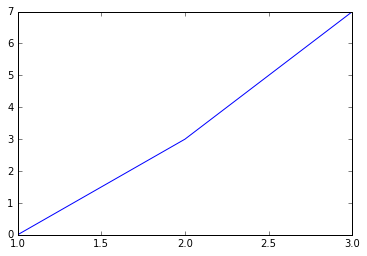

In [1]:
import matplotlib

matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [0, 3, 7])
plt.show()

In [2]:
import pandas as pd
import csv
import numpy as np
from math import sqrt
from sklearn.feature_extraction.text import CountVectorizer
countVector = CountVectorizer(min_df=1)
import re

In [3]:
# Gautam's video input
with open('./data/RAW_abhyudaya/final_gb1.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput = list(reader)

with open('./data/RAW_abhyudaya/final_gb4.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput2 = list(reader)
    
with open('./data/RAW_abhyudaya/final_gb6.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput3 = list(reader)
    
with open('./data/RAW_abhyudaya/final_gb7.csv') as f:
    reader = csv.reader(f)
    affectivavideooutput4 = list(reader)

affectivavideooutput2.pop(0)
affectivavideooutput3.pop(0)
affectivavideooutput4.pop(0)

print len(affectivavideooutput)
print len(affectivavideooutput2)
print len(affectivavideooutput3)
print len(affectivavideooutput4)

affectivavideooutput.extend(affectivavideooutput2)
print len(affectivavideooutput)
#affectivavideooutput.extend(affectivavideooutput3)
print len(affectivavideooutput)
affectivavideooutput.extend(affectivavideooutput4)

print len(affectivavideooutput)
print affectivavideooutput[0]


9467
1952
1553
1676
11419
11419
13095
['', 'TimeStamp', 'interocularDistance', 'glasses', 'pitch', 'yaw', 'roll', 'joy', 'fear', 'disgust', 'sadness', 'anger', 'surprise', 'contempt', 'valence', 'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden', 'cheekRaise', 'lidTighten', 'dimpler', 'lipStretch', 'jawDrop', 'relaxed', 'smiley', 'laughing', 'kissing', 'disappointed', 'rage', 'smirk.1', 'wink', 'stuckOutTongueWinkingEye', 'stuckOutTongue', 'flushed', 'scream', 'FRUSTRATED', 'TIRED', 'ENGAGED', 'CLASS']


In [4]:
print len(affectivavideooutput3)

1553


In [5]:
affectivavideooutput.pop(0)
affectivadataframe = pd.DataFrame(affectivavideooutput, 
                                columns = ['', 'TimeStamp', 'interocularDistance', 'glasses', 'pitch', 'yaw', 'roll', 'joy', 
                                           'fear', 'disgust', 'sadness', 'anger', 'surprise', 'contempt', 'valence', 
                                           'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 
                                           'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 
                                           'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden',
                                           'cheekRaise', 'lidTighten', 'dimpler', 'lipStretch', 'jawDrop', 'relaxed',
                                           'smiley', 'laughing', 'kissing', 'disappointed', 'rage', 'smirk.1', 'wink', 
                                           'stuckOutTongueWinkingEye', 'stuckOutTongue', 'flushed',
                                           'scream', 'frustrated', 'tired', 'engaged', 'class'])
affectivadataframe[0:10]
#drop the columns that are outright irrelevant for data analysis
affectivadataframe = affectivadataframe.drop(['','TimeStamp'],axis=1)
#affectivadataframe[-10:]
print len(affectivadataframe)

13094


In [6]:
import statsmodels.api as sm
X= affectivadataframe[['smile','innerBrowRaise','browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop','engaged','frustrated','tired']].copy()

for column in X.columns:
     X[column]=X[column].apply(lambda x:float(x.replace('"','').replace("\n",'').replace('nan','')))

X['engaged'] = X['engaged'].apply(lambda x:int(x))
X['frustrated'] = X['frustrated'].apply(lambda x:int(x))
X['tired'] = X['tired'].apply(lambda x:int(x))


In [7]:
import sklearn.utils
df = sklearn.utils.shuffle(X)
df = df.reset_index(drop=True)
df[0:10]


,smile,innerBrowRaise,browRaise,browFurrow,noseWrinkle,upperLipRaise,lipCornerDepressor,chinRaise,lipPucker,lipPress,...,attention,eyeWiden,cheekRaise,lidTighten,dimpler,lipStretch,jawDrop,engaged,frustrated,tired
0,0.0008,0.2388,0.0057,0.2553,0.1219,0.0034,0.0001,0.0067,0.0380,0.0946,...,83.0258,0.0026,0.0020,0.0209,0.0112,0.0098,6.4668,1,0,0
1,0.0000,0.0001,0.0005,0.0022,0.0000,0.0000,0.0109,0.0749,0.0017,0.0016,...,89.0099,0.0118,0.4017,0.0544,0.0006,0.0022,0.3176,1,1,1
2,0.0000,0.0004,0.0575,0.0007,0.0000,0.0021,0.0000,0.0000,0.5980,0.0002,...,63.9603,0.0156,0.0108,0.0110,0.0001,0.0001,79.5952,1,0,1
3,0.0003,1.2592,0.0050,0.1682,0.0743,2.2715,4.5193,0.0445,0.0531,3.1848,...,96.6968,0.0034,0.0370,0.0103,89.4438,0.1338,0.0243,1,0,0
4,0.0000,0.7415,0.0310,0.0092,0.0246,0.0473,0.0031,0.0220,0.0129,0.0048,...,94.8980,0.0354,0.0000,0.0057,0.0216,0.0051,0.3838,1,0,0
5,0.0016,2.0825,1.3171,0.0081,0.3119,0.0001,0.0012,99.7759,0.4525,7.3817,...,96.9536,0.0012,70.5788,0.1526,73.1294,0.5042,61.3236,1,0,0
6,0.0000,0.0002,0.0249,0.0174,0.0018,2.4737,0.0791,0.0008,0.1355,0.0091,...,51.7223,3.8399,0.0016,0.0184,0.0081,0.0002,4.2949,1,0,0
7,0.0060,0.0681,0.0143,0.0009,0.0810,30.4586,0.0012,0.0004,5.5293,0.2761,...,98.5840,0.0174,0.0008,0.0074,0.0190,0.1081,94.5897,1,0,0
8,0.0000,0.0000,98.1941,0.0000,0.0000,0.0000,0.0001,0.0411,0.0246,0.0001,...,82.3883,0.0298,0.0002,0.0000,0.0000,0.0001,1.6839,1,0,0
9,0.0000,0.0072,0.8344,0.0266,0.0014,0.0007,2.5742,0.0154,1.3654,0.1056,...,48.9700,1.8493,0.0028,0.0398,0.1563,0.0011,1.1260,1,0,0


In [12]:
dftestVideo = pd.DataFrame(affectivavideooutput3, 
                                columns = ['', 'TimeStamp', 'interocularDistance', 'glasses', 'pitch', 'yaw', 'roll', 'joy', 
                                           'fear', 'disgust', 'sadness', 'anger', 'surprise', 'contempt', 'valence', 
                                           'engagement', 'smile', 'innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 
                                           'upperLipRaise', 'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 
                                           'lipSuck', 'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden',
                                           'cheekRaise', 'lidTighten', 'dimpler', 'lipStretch', 'jawDrop', 'relaxed',
                                           'smiley', 'laughing', 'kissing', 'disappointed', 'rage', 'smirk.1', 'wink', 
                                           'stuckOutTongueWinkingEye', 'stuckOutTongue', 'flushed',
                                           'scream', 'frustrated', 'tired', 'engaged', 'class'])
affectivadataframe[0:10]
#drop the columns that are outright irrelevant for data analysis
dftestVideo = dftestVideo.drop(['','TimeStamp'],axis=1)
#affectivadataframe[-10:]
print len(dftestVideo)
for column in dftestVideo.columns:
     dftestVideo[column]=dftestVideo[column].apply(lambda x:float(x.replace('"','').replace("\n",'').replace('nan','')))

dftestVideo['engaged'] = dftestVideo['engaged'].apply(lambda x:int(x))
dftestVideo['frustrated'] = dftestVideo['frustrated'].apply(lambda x:int(x))
dftestVideo['tired'] = dftestVideo['tired'].apply(lambda x:int(x))

1553


In [9]:
import statsmodels.api as sm
X= affectivadataframe[['smile','innerBrowRaise','browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'attention', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop','engaged','frustrated','tired']].copy()

for column in X.columns:
     X[column]=X[column].apply(lambda x:float(x.replace('"','').replace("\n",'').replace('nan','')))

X['engaged'] = X['engaged'].apply(lambda x:int(x))
X['frustrated'] = X['frustrated'].apply(lambda x:int(x))
X['tired'] = X['tired'].apply(lambda x:int(x))
dftrain = X
print len(dftrain)

13094


In [10]:
from sklearn.preprocessing import StandardScaler
explanatoryStd = X[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']].copy() 
X_std = X
#X_std = StandardScaler().fit_transform(explanatoryStd)
backtodf = pd.DataFrame(X_std, index=explanatoryStd.index, columns=explanatoryStd.columns)
Dependent = X['frustrated']
logit = sm.Logit(Dependent,backtodf)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.371130
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             frustrated   No. Observations:                13094
Model:                          Logit   Df Residuals:                    13074
Method:                           MLE   Df Model:                           19
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                -0.06581
Time:                        08:59:02   Log-Likelihood:                -4859.6
converged:                       True   LL-Null:                       -4559.5
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
smile                 -0.9840      0.441     -2.233      0.026        -1.848    -0.120
inne

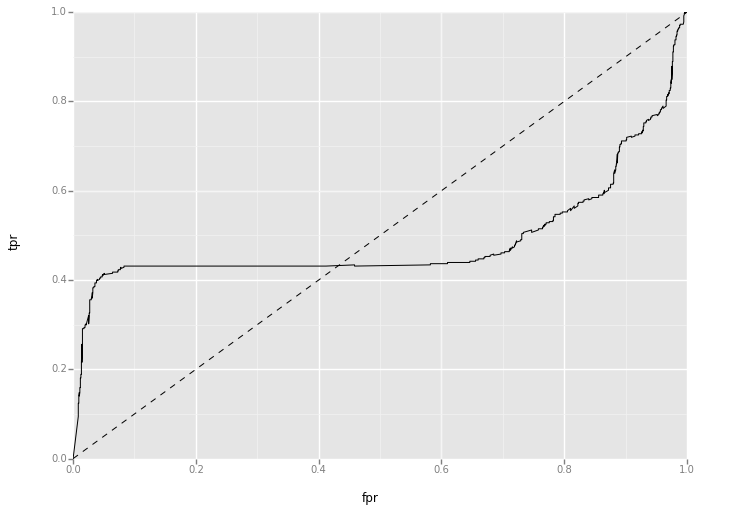

<ggplot: (297658193)>

In [14]:

from sklearn import metrics
from math import sqrt 
from ggplot import *
count1 = 0
count0 = 0
count = 0
sum1 = 0.0

per = result.predict(dftestVideo[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']] )

fpr, tpr, pr = metrics.roc_curve(dftestVideo['frustrated'], per)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

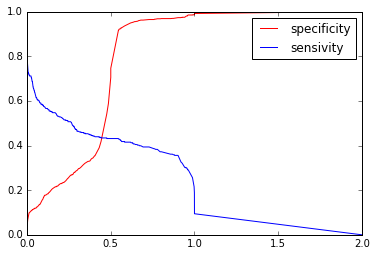

In [15]:
from numpy import *
import math
import matplotlib.pyplot as plt
#print 1-fpr
plt.plot(pr,1-fpr,'r',label= 'specificity')
plt.plot(pr,tpr,'b',label= 'sensivity')
plt.legend()

In [16]:
auc = metrics.auc(fpr,tpr)
print auc

0.487599253857


In [102]:
for i in pr:
    if i > 1:
        print i

1.99999996883


In [103]:
from sklearn.preprocessing import StandardScaler
explanatoryStd = dftrain[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']].copy() 
X_std = StandardScaler().fit_transform(explanatoryStd)
backtodf = pd.DataFrame(X_std, index=explanatoryStd.index, columns=explanatoryStd.columns)
Dependent = dftrain['engaged']
logit = sm.Logit(Dependent,backtodf)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.667587
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                engaged   No. Observations:                13182
Model:                          Logit   Df Residuals:                    13162
Method:                           MLE   Df Model:                           19
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                 -0.4559
Time:                        08:34:29   Log-Likelihood:                -8800.1
converged:                       True   LL-Null:                       -6044.3
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
smile                  0.0164      0.022      0.744      0.457        -0.027     0.060
inner

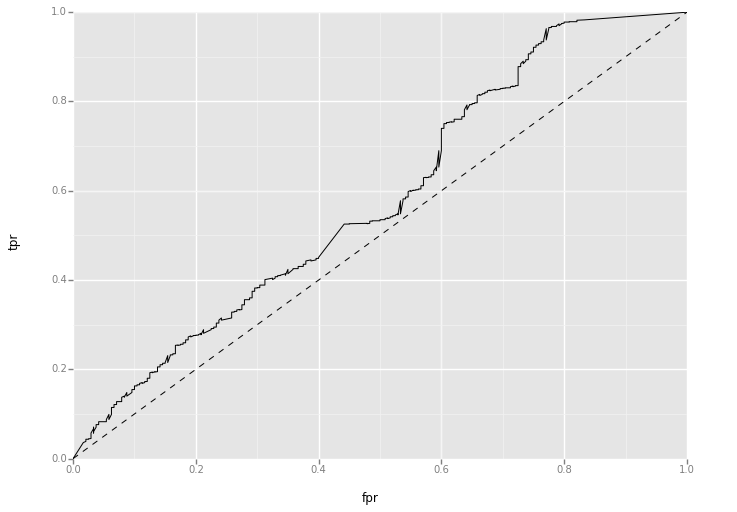

<ggplot: (322371465)>

In [104]:
from sklearn import metrics
from math import sqrt 
from ggplot import *
count1 = 0
count0 = 0
count = 0
sum1 = 0.0

per = result.predict(dftest[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']] )

fpr, tpr, pr = metrics.roc_curve(dftest['engaged'], per)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

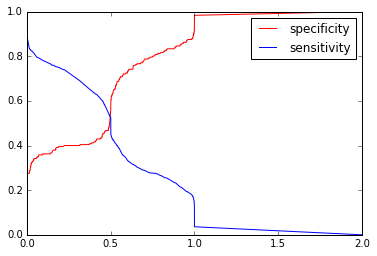

In [105]:
from numpy import *
import math
import matplotlib.pyplot as plt
#print 1-fpr
plt.plot(pr,1-fpr,'r',label= 'specificity')
plt.plot(pr,tpr,'b',label= 'sensitivity')
plt.legend()

In [77]:
from sklearn.preprocessing import StandardScaler
explanatoryStd = dftrain[['innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']].copy() 
X_std = StandardScaler().fit_transform(explanatoryStd)
backtodf = pd.DataFrame(X_std, index=explanatoryStd.index, columns=explanatoryStd.columns)
Dependent = dftrain['tired']
logit = sm.Logit(Dependent,backtodf)
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.684854
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  tired   No. Observations:                13182
Model:                          Logit   Df Residuals:                    13163
Method:                           MLE   Df Model:                           18
Date:                Thu, 08 Dec 2016   Pseudo R-squ.:                  -2.530
Time:                        08:29:11   Log-Likelihood:                -9027.7
converged:                       True   LL-Null:                       -2557.3
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
innerBrowRaise         0.0983      0.020      4.957      0.000         0.059     0.137
browR

In [106]:
auc = metrics.auc(fpr,tpr)
print auc

0.58232405892


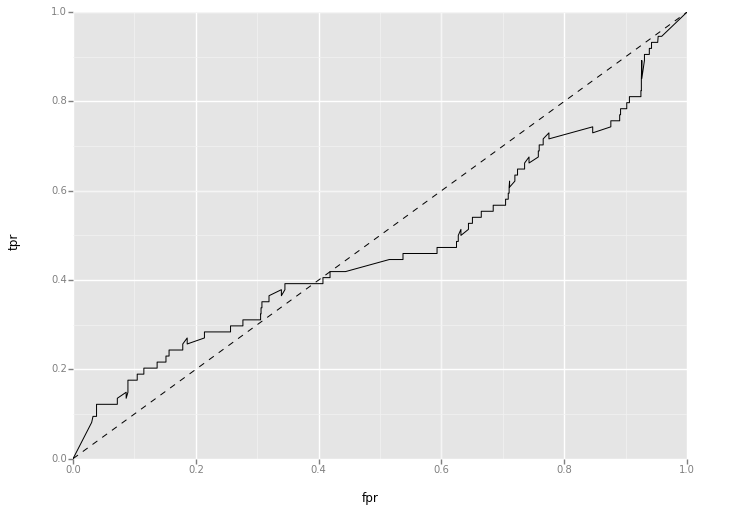

<ggplot: (319607045)>

In [107]:
from sklearn import metrics
from math import sqrt 
from ggplot import *
count1 = 0
count0 = 0
count = 0
sum1 = 0.0

per = result.predict(dftest[['smile','innerBrowRaise', 'browRaise', 'browFurrow', 'noseWrinkle', 'upperLipRaise', 
                        'lipCornerDepressor', 'chinRaise', 'lipPucker', 'lipPress', 'lipSuck', 
                        'mouthOpen', 'smirk', 'eyeClosure', 'eyeWiden', 'cheekRaise',
                        'lidTighten', 'dimpler', 'lipStretch', 'jawDrop']] )

fpr, tpr, pr = metrics.roc_curve(dftest['tired'], per)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [108]:
auc = metrics.auc(fpr,tpr)
print auc

0.472359607446
